In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('dataset.csv')

In [4]:
df.head(10)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,card number
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good,9999
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,1000
2,2,49,male,1,own,little,NaN,2096,12,education,good,1001
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good,1002
4,4,53,male,2,free,little,little,4870,24,car,bad,1003
5,5,35,male,1,free,NaN,NaN,9055,36,education,good,1004
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good,1005
7,7,35,male,3,rent,little,moderate,6948,36,car,good,1006
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV,good,1007
9,9,28,male,3,own,little,moderate,5234,30,car,bad,1008


In [5]:
df = df.drop(['Unnamed: 0'], axis = 1)  

In [7]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,card number
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,9999
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,1000
2,49,male,1,own,little,NaN,2096,12,education,good,1001
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,1002
4,53,male,2,free,little,little,4870,24,car,bad,1003


In [8]:
df.shape

(1000, 11)

In [6]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
card number           0
dtype: int64

In [9]:
df.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
card number          int64
dtype: object

In [29]:
print(df.groupby('Housing').size())
print('\n',df.groupby('Saving accounts').size())
print('\n',df.groupby('Checking account').size())
print('\n',df.groupby('Purpose').size())
print('\n',df.groupby('Risk').size())

Housing
free    108
own     713
rent    179
dtype: int64

 Saving accounts
little        786
moderate      103
quite rich     63
rich           48
dtype: int64

 Checking account
little      668
moderate    269
rich         63
dtype: int64

 Purpose
business                97
car                    337
domestic appliances     12
education               59
furniture/equipment    181
radio/TV               280
repairs                 22
vacation/others         12
dtype: int64

 Risk
bad     300
good    700
dtype: int64


In [30]:
df['Saving accounts'].fillna('little', inplace = True)

In [31]:
df['Checking account'].fillna('little', inplace = True)

In [32]:
df.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
card number         0
dtype: int64

In [33]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,card number
0,67,male,2,own,little,little,1169,6,radio/TV,good,9999
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,1000
2,49,male,1,own,little,little,2096,12,education,good,1001
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,1002
4,53,male,2,free,little,little,4870,24,car,bad,1003


In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [35]:
df['Housing'] = le.fit_transform(df['Housing'])
df['Saving accounts'] = le.fit_transform(df['Saving accounts'])
df['Checking account'] = le.fit_transform(df['Checking account'])
df['Purpose'] = le.fit_transform(df['Purpose'])
df['Risk'] = le.fit_transform(df['Risk'])
df['Sex'] = le.fit_transform(df['Sex'])

In [36]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,card number
0,67,1,2,1,0,0,1169,6,5,1,9999
1,22,0,2,1,0,1,5951,48,5,0,1000
2,49,1,1,1,0,0,2096,12,3,1,1001
3,45,1,2,0,0,0,7882,42,4,1,1002
4,53,1,2,0,0,0,4870,24,1,0,1003


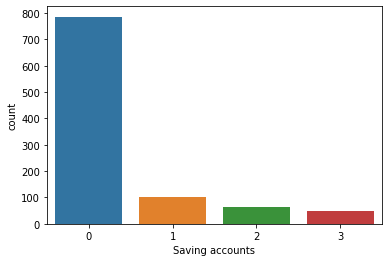

In [37]:
sns.countplot(df['Saving accounts'])
plt.show()

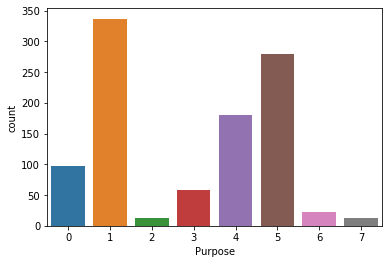

In [38]:
sns.countplot(df['Purpose'])
plt.show()

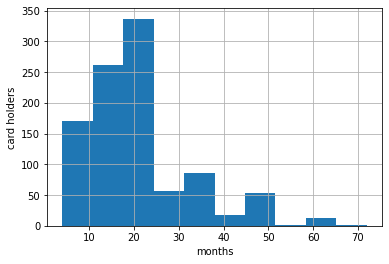

In [39]:
df['Duration'].hist()
plt.xlabel('months')
plt.ylabel('card holders')
plt.show()

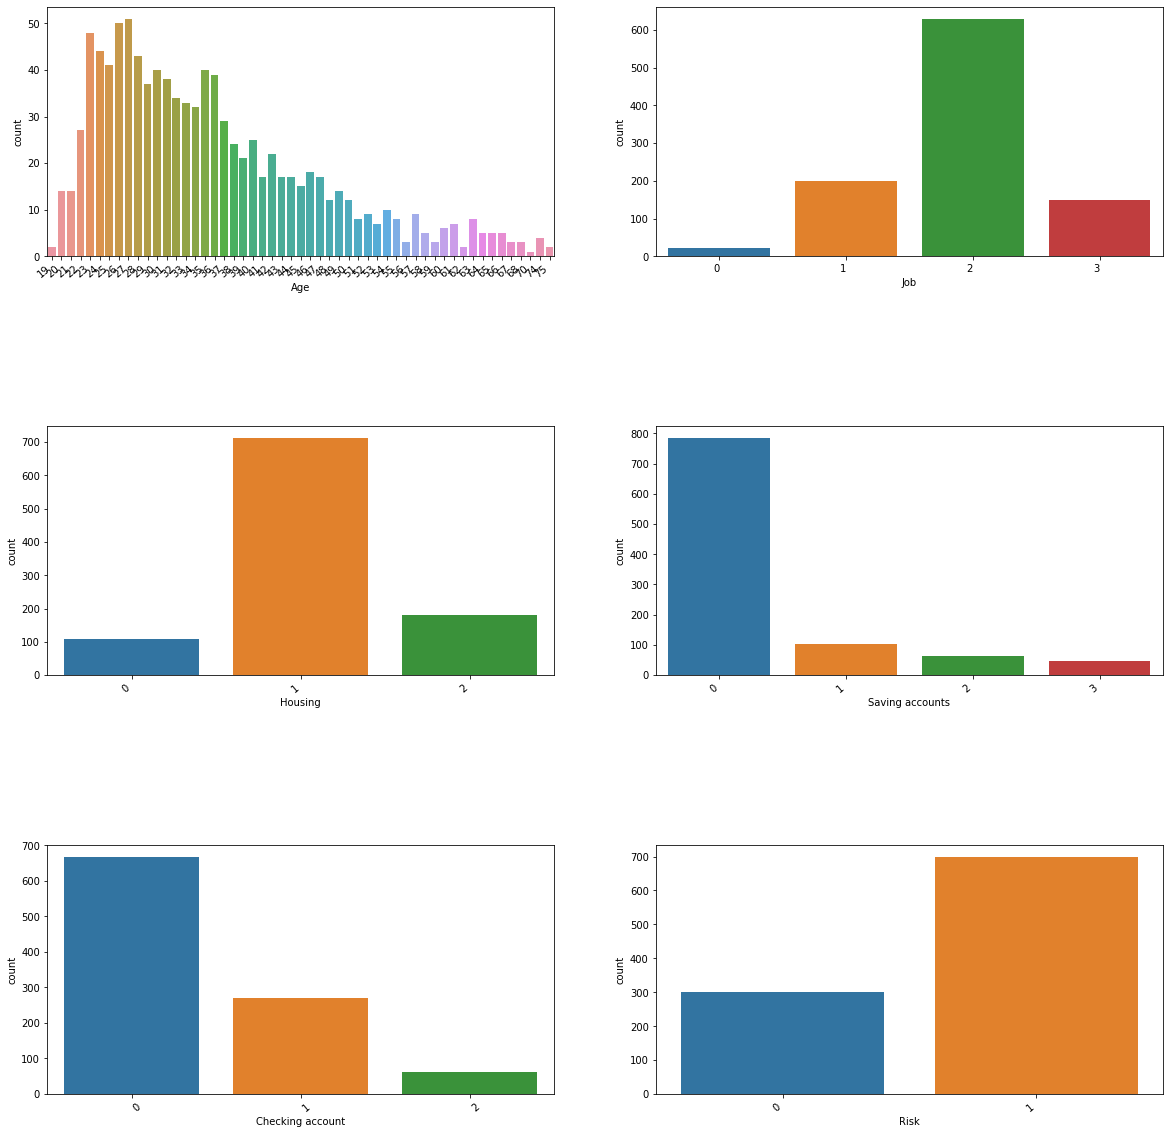

In [40]:
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(20, 20))
plt.subplots_adjust(hspace=0.68)

# Age
ag_plot = sns.countplot(df['Age'], ax=axs[0][0])
ag_plot.set_xticklabels(ag_plot.get_xticklabels(), rotation=40, ha="right")

# job
jb_plot = sns.countplot(df['Job'], ax=axs[0][1])
jb_plot.set_xticklabels(jb_plot.get_xticklabels(), ha="right")

# Housing
hg_plot = sns.countplot(df['Housing'], ax=axs[1][0])
hg_plot.set_xticklabels(hg_plot.get_xticklabels(), rotation=40, ha="right")

# Saving accounts
sa_plot = sns.countplot(df['Saving accounts'], ax=axs[1][1])
sa_plot.set_xticklabels(sa_plot.get_xticklabels(), rotation=40, ha="right")

# Checking account
ca_plot = sns.countplot(df['Checking account'], ax=axs[2][0])
ca_plot.set_xticklabels(ca_plot.get_xticklabels(), rotation=40, ha="left")

# Risk
r_plot = sns.countplot(df['Risk'], ax=axs[2][1])
r_plot.set_xticklabels(r_plot.get_xticklabels(), rotation=40, ha="right")

plt.show()

In [41]:

X=df.drop('Risk',axis=1)
Y=df['Risk']

In [42]:
X

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,card number
0,67,1,2,1,0,0,1169,6,5,9999
1,22,0,2,1,0,1,5951,48,5,1000
2,49,1,1,1,0,0,2096,12,3,1001
3,45,1,2,0,0,0,7882,42,4,1002
4,53,1,2,0,0,0,4870,24,1,1003
...,...,...,...,...,...,...,...,...,...,...
995,31,0,1,1,0,0,1736,12,4,1994
996,40,1,3,1,0,0,3857,30,1,1995
997,38,1,2,1,0,0,804,12,5,1996
998,23,1,2,0,0,0,1845,45,5,1997


In [43]:
Y

0      1
1      0
2      1
3      1
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Risk, Length: 1000, dtype: int32

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X.values,Y.values,test_size = 0.30,random_state = 1)

# k nearest neighbours

In [45]:

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,Y_train)
y_pred = knn.predict(X_test)

In [46]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9
0,34,1,3,1,1,1,6850,15,1,1506
1,43,1,3,1,0,0,15857,36,7,1817
2,34,1,2,1,0,0,2759,12,4,1451
3,42,1,2,1,0,0,3446,36,4,1367
4,24,1,2,0,0,0,4605,48,1,1241
...,...,...,...,...,...,...,...,...,...,...
295,32,1,2,1,0,0,4594,18,5,1458
296,35,1,2,1,0,0,5842,36,1,1414
297,50,1,2,1,0,1,1537,15,5,1060
298,23,0,0,2,2,1,3758,24,5,1346


In [47]:
knn.predict([[42,1,2,1,0,0,3446,36,4,1367]])

array([1])

In [48]:
y_pred

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1])

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
accuracy_knn=accuracy_score(Y_test,y_pred)
print(accuracy_knn)

0.64


## Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [53]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9
0,34,1,3,1,1,1,6850,15,1,1506
1,43,1,3,1,0,0,15857,36,7,1817
2,34,1,2,1,0,0,2759,12,4,1451
3,42,1,2,1,0,0,3446,36,4,1367
4,24,1,2,0,0,0,4605,48,1,1241
...,...,...,...,...,...,...,...,...,...,...
295,32,1,2,1,0,0,4594,18,5,1458
296,35,1,2,1,0,0,5842,36,1,1414
297,50,1,2,1,0,1,1537,15,5,1060
298,23,0,0,2,2,1,3758,24,5,1346


In [54]:
log_reg.predict([[32,1,2,1,0,0,4594,18,5,1458]])

array([1])

In [55]:
accuracy_LR=accuracy_score(Y_test,y_pred)
print(accuracy_LR)

0.74


# Random forest

In [56]:
from sklearn.ensemble import RandomForestClassifier 

In [57]:
rns=RandomForestClassifier()
rns.fit(X.values,Y.values)
y_pred=rns.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [58]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9
0,34,1,3,1,1,1,6850,15,1,1506
1,43,1,3,1,0,0,15857,36,7,1817
2,34,1,2,1,0,0,2759,12,4,1451
3,42,1,2,1,0,0,3446,36,4,1367
4,24,1,2,0,0,0,4605,48,1,1241
...,...,...,...,...,...,...,...,...,...,...
295,32,1,2,1,0,0,4594,18,5,1458
296,35,1,2,1,0,0,5842,36,1,1414
297,50,1,2,1,0,1,1537,15,5,1060
298,23,0,0,2,2,1,3758,24,5,1346


In [59]:
rns.predict([[50,1,2,1,0,1,1537,15,5,1060]])

array([1])

In [60]:
accuracy_RF=accuracy_score(Y_test,y_pred)
print(accuracy_RF)

0.99


In [61]:
import seaborn as sns

In [62]:
X_axis = ['KNN','LR','RF']
Y_axis = ['accuracy_knn','accuracy_LR','accuracy_RF']

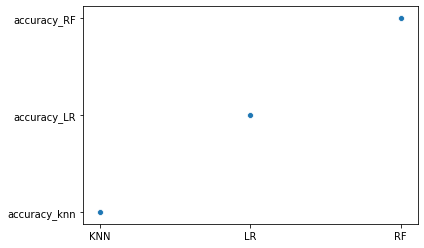

In [63]:
X_axis = ['KNN','LR','RF']
Y_axis = ['accuracy_knn','accuracy_LR','accuracy_RF']
sns.scatterplot(X_axis,Y_axis)

# Predicting  fraud or not by entering card number

In [64]:
card = int(input('Enter customer card number: '))
#df.info()

Enter customer card number: 9999


In [65]:
cpy_df = df[df['card number']==card]
cpy_df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,card number
0,67,1,2,1,0,0,1169,6,5,1,9999


In [66]:

cpy_df['Risk'].values

array([1])